# Google Stock Price Prediction

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset and training set

In [2]:
dataset = pd.read_csv('GOOG.csv')
data = dataset.iloc[:, 4:5].values

#### Splitting the dataset into train (80%) and test (20%)

In [3]:
train_size = int(len(data) * 0.80)
training_set, test_set = data[:train_size], data[train_size:]

### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.transform(test_set)

### Creating data structure with 60 time steps

In [5]:
def create_sequences(dataset, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(dataset)):
        X.append(dataset[i-time_steps:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

### Prepare training and test sets

In [6]:
X_train, y_train = create_sequences(training_set_scaled)
X_test, y_test = create_sequences(test_set_scaled)

### Reshaping for LSTM input

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

## Building the RNN model

### Importing the Keras libraries and packages

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [9]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 125, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

C:\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 125, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 125))
regressor.add(Dropout(0.2))

### Adding the output layer

In [13]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting RNN to Train the model

In [15]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
regressor.fit(X_train, y_train, epochs=25, batch_size=32, callbacks=[early_stop])

Epoch 1/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - loss: 0.0133
Epoch 2/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 9.6712e-04
Epoch 3/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 9.7447e-04
Epoch 4/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 7.9511e-04
Epoch 5/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - loss: 7.6242e-04
Epoch 6/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 8.5743e-04
Epoch 7/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 7.9665e-04
Epoch 8/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 8.6349e-04
Epoch 9/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - loss: 6.3522e-04
Epoch 10/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 9.6019e-04
Epoch 11/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 5.7232e-04
Epoch 12/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 5.5139e-04
Epoch 13/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 6.3647e-04
Epoch 14/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss:

# Making the predictions and visualising the results

### Making predictions

In [16]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price.reshape(-1, 1))

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step  


### Convert y_test back to original scale

In [17]:
real_stock_price = sc.inverse_transform(y_test.reshape(-1, 1))

### Visualizing the results

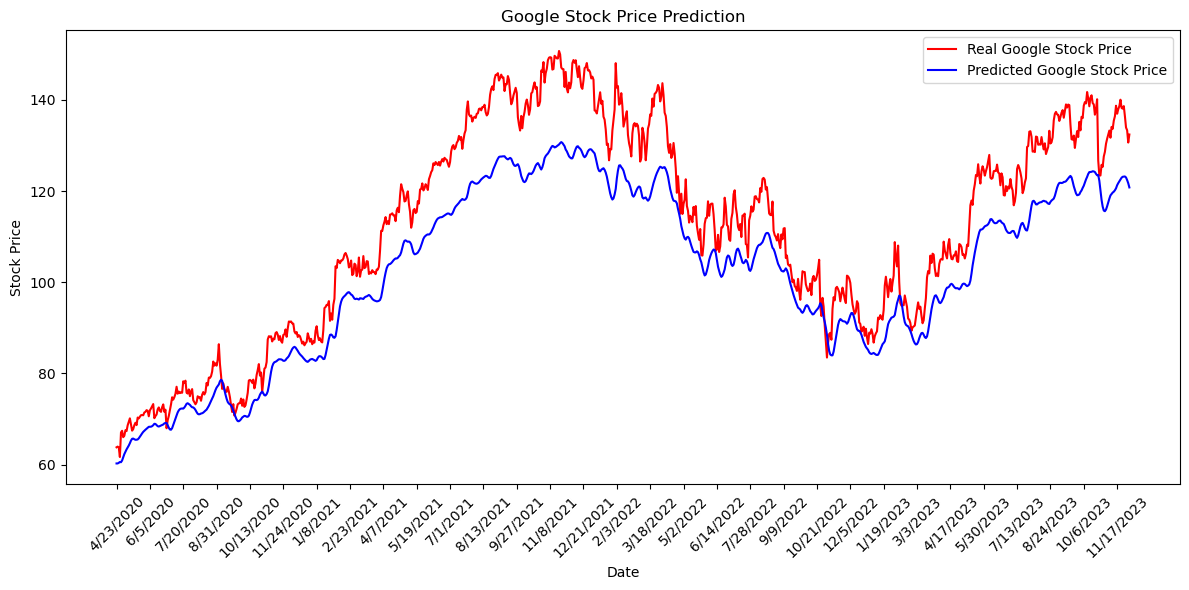

In [18]:
dates = dataset['Date'].values[train_size + 60:]
plt.figure(figsize=(12,6))
plt.plot(dates, real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(dates, predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(dates[::30], rotation=45)
plt.tight_layout()
plt.show()